In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import os 
import pathlib as pth

In [5]:
data_dir = pth.Path('/home/jleland/data/rona')
os.chdir(data_dir)

data_filename = next(data_dir.glob('TRno32.CSV'))

In [27]:
data = pd.read_csv(data_filename, header=6).drop(columns=['Unnamed: 3'], index=[0,1,2])
data

,Well,Content,Difference 15min
3,A10,Sample X1,-0.009
4,B10,Sample X1,-0.005
5,C10,Sample X1,0.010
6,A09,Sample X2,0.148
7,B09,Sample X2,0.123
8,C09,Sample X2,0.126
9,A08,Sample X3,-0.002
10,B08,Sample X3,-0.004
11,C08,Sample X3,-0.008
12,A07,Sample X4,0.242


In [21]:
averages = data.groupby('Content').mean()
std_errs = data.groupby('Content').std() / np.sqrt(3)

In [42]:
sample_choice = [
    'Sample X11',
    'Sample X3',
    'Sample X5',
    'Sample X6'
]
labels = [
    'x-label_1',
    'x-label_2',
    'x-label_3',
    'x-label_4',
]

plot_data = averages.loc[sample_choice]['Difference 15min']
plot_edata = std_errs.loc[sample_choice]['Difference 15min']

Text(0, 0.5, 'Decrease in absorbance \n at 340nm (n=2)')

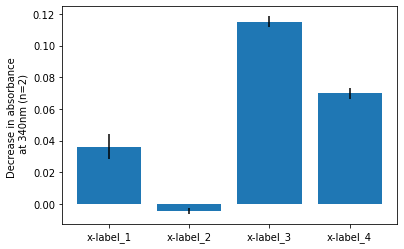

In [43]:
fig, ax = plt.subplots()
ax.bar(labels, plot_data, yerr=plot_edata)
ax.set_ylabel('Decrease in absorbance \n at 340nm (n=2)')